In [34]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   


#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packa

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [114]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [115]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
# X = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X)
# df=pd.DataFrame(x_scaled, columns=df.columns)


In [116]:
 #Splitting dataset to x and y
y = df.Attack
X = df[['Defense','HP','Sp. Atk','Sp. Def','Speed']]

In [117]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

# MultiVariate  Regression with sklearn

In [118]:
 from sklearn.linear_model import LinearRegression
 from sklearn import metrics
X = df[['HP']]

In [119]:
def MultiVariateLinearRegression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
    regr = LinearRegression()
    regr.fit(X, y) 
    print('linear model coeff (w): {}'.format(regr.coef_)) 
    print('linear model intercept (b): {:.3f}'.format(regr.intercept_)) 
    print('R-squared score (training): {:.3f}'.format(regr.score(X_train, y_train))) 
    print('R-squared score (test): {:.3f}'.format(regr.score(X_test, y_test)))  
    # make predictions on the testing set
    y_pred = regr.predict(X_test)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))  
    plt.figure(figsize=(5,4))
    plt.scatter(X, y)
    plt.plot(X, regr.coef_ * X + regr.intercept_, 'r-')
    plt.title('Least-squares linear regression')
    plt.xlabel('Feature value (x)')
    plt.ylabel('Target value (y)')
    plt.show()


linear model coeff (w): [0.49688982]
linear model intercept (b): 41.857
R-squared score (training): 0.178
R-squared score (test): 0.189
RMSE: 27.929


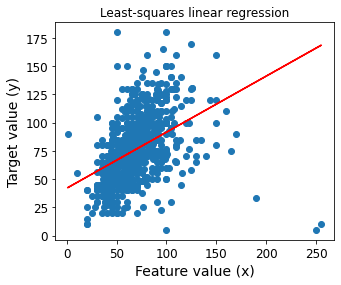

In [120]:
MultiVariateLinearRegression(X,y)

# Linear Regression with Gradient Descent 

In [121]:
X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[41.85738349  0.49688982]


In [122]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([41.85738349, 42.85116314])

In [123]:
eta = 0.1
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))
print (theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

[ 0.16965289 -0.0030126 ]


array([-1.58368011e+37, -1.24252981e+39])

In [124]:
X_b.dot(theta)

array([-5.59296784e+40, -7.45676256e+40, -9.94182219e+40, -4.84744995e+40,
       -7.20825660e+40, -9.69331622e+40, -5.46871486e+40, -7.33250958e+40,
       -9.81756921e+40, -5.59296784e+40, -6.21423275e+40, -7.45676256e+40,
       -4.97170293e+40, -5.59296784e+40, -8.07802747e+40, -4.97170293e+40,
       -7.82952150e+40, -1.03145811e+41, -3.72917312e+40, -6.83549765e+40,
       -4.97170293e+40, -8.07802747e+40, -4.35043803e+40, -7.45676256e+40,
       -4.35043803e+40, -7.45676256e+40, -6.21423275e+40, -9.32055728e+40,
       -6.83549765e+40, -8.69929237e+40, -1.11843520e+41, -5.71722082e+40,
       -7.58101554e+40, -1.00660752e+41, -8.69929237e+40, -1.18056169e+41,
       -4.72319697e+40, -9.07205132e+40, -1.42906765e+41, -1.73970011e+41,
       -4.97170293e+40, -9.32055728e+40, -5.59296784e+40, -7.45676256e+40,
       -9.32055728e+40, -4.35043803e+40, -7.45676256e+40, -7.45676256e+40,
       -8.69929237e+40, -1.24411349e+40, -4.35043803e+40, -4.97170293e+40,
       -8.07802747e+40, -

In [125]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 240, 0, 350])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<ipython-input-125-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-125-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-125-3ecd99aff936>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


Saving figure gradient_descent_plot


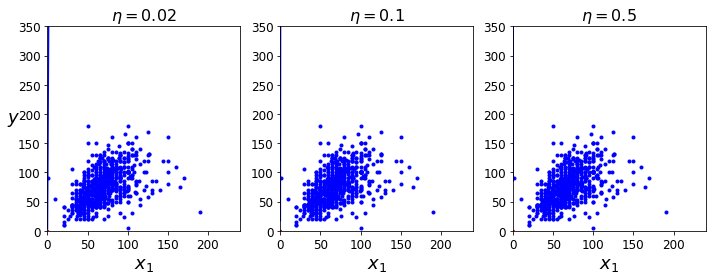

In [126]:
np.random.seed(42)
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# Regularized Regression Model
## Ridge

In [127]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=25.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 37.879895479418444
ridge regression linear model coeff:
[0.55416038]
R-squared score (training): 0.203
R-squared score (test): 0.116
Number of non-zero features: 1


In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 38.43131123444442
ridge regression linear model coeff:
[137.99618455]
R-squared score (training): 0.203
R-squared score (test): 0.116
Number of non-zero features: 1


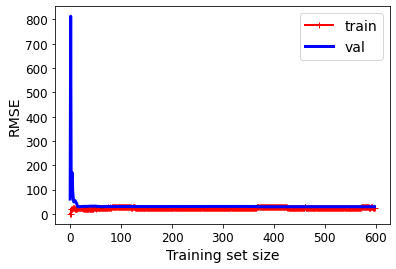

In [129]:
plot_learning_curves(linridge,X,y)

In [130]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.20, r-squared test: 0.12

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.20, r-squared test: 0.14

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.12, r-squared test: 0.11

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.08, r-squared test: 0.07

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.04, r-squared test: 0.03

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.02, r-squared test: 0.02

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.00, r-squared test: -0.00



## Lasso Regression

In [131]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=1, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 66.20384241687611
lasso regression linear model coeff:
[34.28143912]
Non-zero features: 1
R-squared score (training): 0.089
R-squared score (test): 0.084

Features with non-zero weight (sorted by absolute magnitude):
	HP, 34.281


/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


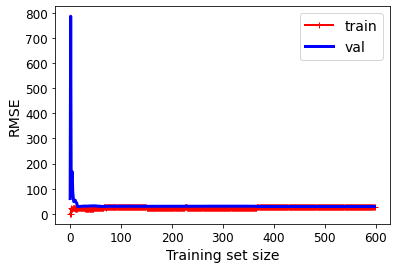

In [132]:
plot_learning_curves(linlasso,X,y)

In [133]:

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 1, r-squared training: 0.17, r-squared test: 0.14

Alpha = 1.00
Features kept: 1, r-squared training: 0.09, r-squared test: 0.08

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.01



## Polynomial regression

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
    

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

POLYNOMIAL DEGREE-2 W/ LINEAR REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.          1.73626401 -0.00691279]
(poly deg 2) linear model intercept (b): -6.327
(poly deg 2) R-squared score (training): 0.323
(poly deg 2) R-squared score (test): 0.320
(poly deg 2) RMSE score (train): 24.717
(poly deg 2) RMSE score (test): 24.249

POLYNOMIAL DEGREE-3 W/ LINEAR REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  1.47304682e+00 -4.10179920e-03 -8.16642267e-06]
(poly deg 3) linear model intercept (b): 0.628
(poly deg 3) R-squared score (training): 0.324
(poly deg 3) R-squared score (test): 0.318
(poly deg 3) RMSE score (train): 24.702
(poly deg 3) RMSE score (test): 24.276

POLYNOMIAL DEGREE-5 W/ LINEAR REGRESSION
(poly deg 5) linear model coeff (w):
[ 0.00000000e+00 -2.50873533e+00  8.06158414e-02 -7.83143911e-04
  3.07805432e-06 -4.36221637e-09]
(poly deg 5) linear model intercept (b): 64.435
(poly deg 5) R-squared score (training): 0.341
(poly deg 5) R-squared score (tes

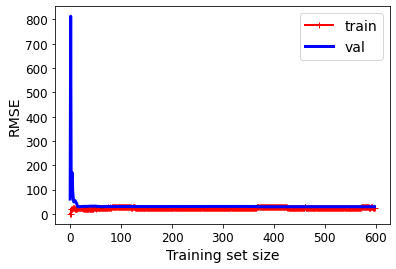

In [135]:
for degree in [2, 3, 5,10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ LINEAR REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)

POLYNOMIAL DEGREE-2 W/ RIDGE REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.          1.73621897 -0.00691255]
(poly deg 2) linear model intercept (b): -6.325
(poly deg 2) R-squared score (training): 0.323
(poly deg 2) R-squared score (test): 0.320
(poly deg 2) RMSE score (train): 24.717
(poly deg 2) RMSE score (test): 24.249

POLYNOMIAL DEGREE-3 W/ RIDGE REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  1.47276330e+00 -4.09898156e-03 -8.17403368e-06]
(poly deg 3) linear model intercept (b): 0.636
(poly deg 3) R-squared score (training): 0.324
(poly deg 3) R-squared score (test): 0.318
(poly deg 3) RMSE score (train): 24.702
(poly deg 3) RMSE score (test): 24.276

POLYNOMIAL DEGREE-5 W/ RIDGE REGRESSION
(poly deg 5) linear model coeff (w):
[ 0.00000000e+00 -2.50118554e+00  8.04409296e-02 -7.81351547e-04
  3.06986891e-06 -4.34876994e-09]
(poly deg 5) linear model intercept (b): 64.321
(poly deg 5) R-squared score (training): 0.341
(poly deg 5) R-squared score (test):

/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.49706e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09263e-48): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


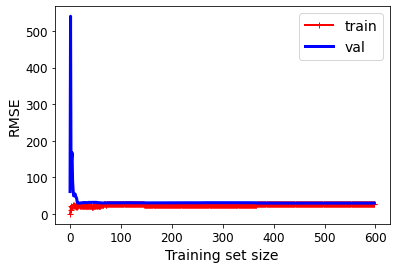

In [136]:
for degree in [2, 3, 5, 10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = Ridge().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ RIDGE REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)